## Introduction to Data Science

## The CRISP-DM approach to Data Science Tasks

### Carlos César e André Costa
[Nosso Git](https://github.com/CarCesar/AMD.git)


#### Mini indice:
* [Git Hub](https://github.com/CarCesar/AMD)
    * [Notebook](https://github.com/CarCesar/AMD/tree/main/Trabalho-Notebook)
        * [Dados](https://github.com/CarCesar/AMD/tree/main/Trabalho-Notebook/Dados)
        * [Codigo `WEB-SCRAPING`](https://github.com/CarCesar/AMD/blob/main/Trabalho-Notebook/Dados/Serie%20B%202020.ipynb)
    * [Streamlit](https://github.com/CarCesar/AMD/blob/main/site.py)
* [Aplicação](https://share.streamlit.io/carcesar/amd/main/site.py)



_________________________
## I. Business Understanding
                    
#### The Business Understanding phase focuses on understanding the objectives and requirements of the project.  
+ Determine business objectives:  

  - O projeto visa determinar os futuros resultados dos times na Série B do Campeonato Brasileiro, buscando predizer quais times serão mais bem sucedidos baseando se nos seus índices em campo, como Posse de bola, Finalizações e outros.


+ Assess situation:  

  - O Campeonato Brasileiro Série B é disputado por 20  Clubes ao longo de 38 rodadas, em um sistema de pontos corridos, com turno e returno, em que todos os times jogam contra todos os outros. No final, os 4 primeiros são promovidos para a Série A do Campeonato, e os 4 últimos rebaixados para Serie C.


+ Determine data mining goals:  

  - Os dados do Campeonato atual e de versões anteriores serão adquiridos através da ~~API do Footstats~~ e/ou do site https://fbref.com/ (por enquanto usamos apenas o site).


+ Produce project plan:  
  - Obter os dados em sites esportivos
  - Verificar se nossos entendimentos de negócio estão corretos. 
     - Caso sim, limpar os dados.
     - Caso não, voltar e redefini-lós.
  - Então, fazer um modelo de regressão para determinar posição.
  - Se possivel, pensamos em fazer um classificador "Sobe" ou "Não Sobe".
  - Ficar rico em Sites de Aposta.


## II. Data Understanding  

+ Collect initial data:  
+ Describe data:  
+ Explore data:  
+ Verify data quality:  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('.\Dados\oi1920.csv',sep=';')

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NJogadores,40.0,39.6250,5.338239,27.0,36.00,40.0,43.25,48.0
MediaIdade,40.0,269.5750,11.508943,250.0,260.00,270.0,278.25,294.0
Posse,40.0,50.0675,3.075827,43.1,48.55,49.7,51.75,60.0
GolsPro,40.0,39.1750,8.186567,26.0,33.00,39.5,44.00,62.0
Assistencias,40.0,25.9500,6.029628,15.0,22.00,26.0,30.00,39.0
PenalConvertidos,40.0,3.5500,1.782393,0.0,2.00,3.0,4.25,8.0
PenalBatidos,40.0,4.8750,2.209391,0.0,3.00,5.0,6.25,9.0
CAmarelo,40.0,92.5500,11.734127,60.0,87.00,93.5,100.50,117.0
CVermelho,40.0,4.1750,2.074108,0.0,3.00,4.0,5.25,9.0
GolsSofridos,40.0,39.1750,8.139450,21.0,33.00,39.5,45.00,56.0


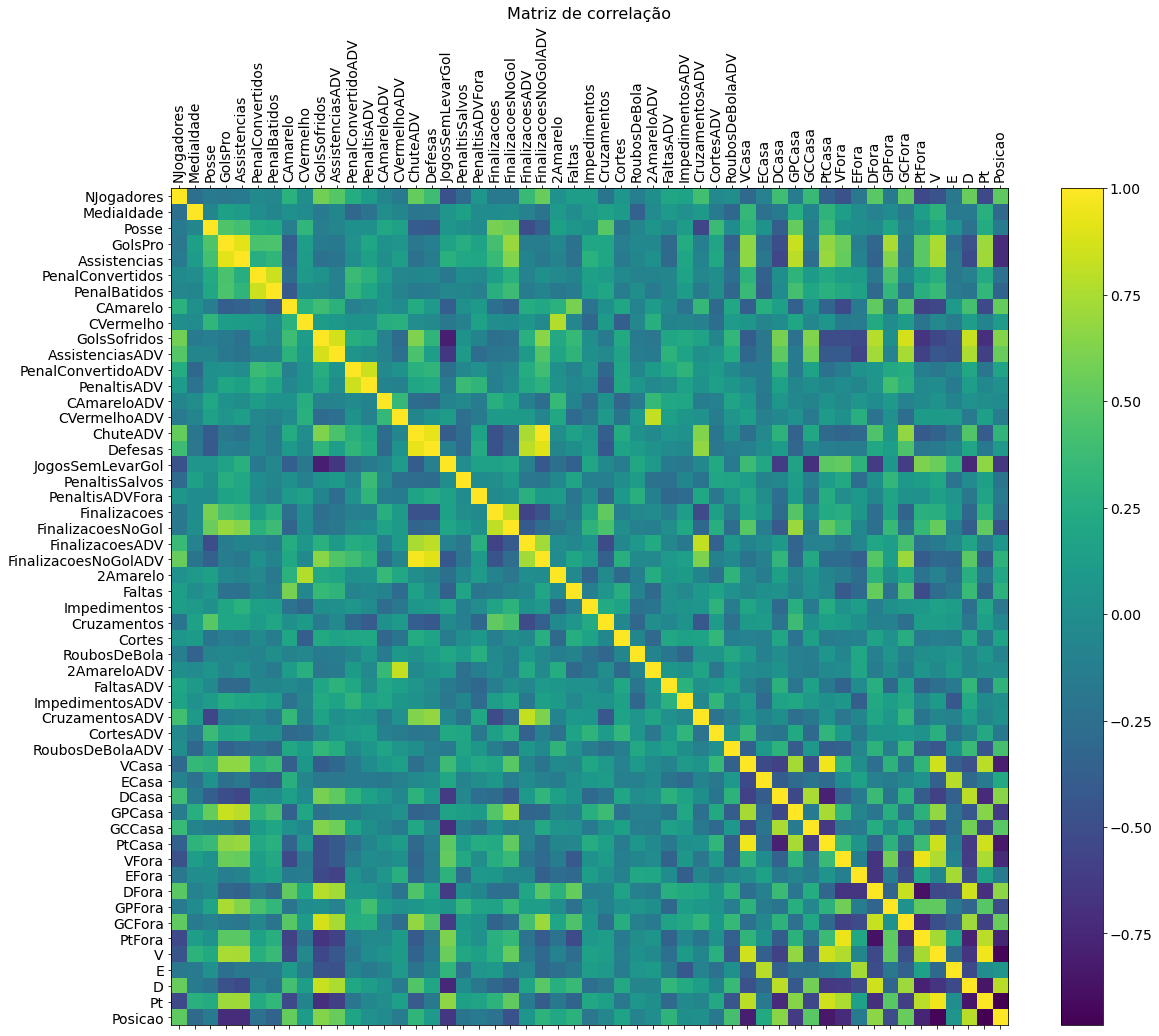

In [4]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlação', fontsize=16);

In [5]:
lista = ["nome da equipe","número de jogadores que entraram em campo pela equipe", "média de idade dos jogares da equipe",
 "percentual de posse de bola", "número de gols marcados", "número de assistencias","número de pênaltis que viraram gol",
 "número de pênaltis batidos", "número Cartoes amarelos", 'numero Cartoes vermelhos','número de gols sofridos', "número de assistencias de adversários" ,
    "gols de pênaltis que o adversário fez contra a equipe", "total de pênaltis que adversários tiveram contra a equipe" , "número de cartoes amarelo que os adversários receberam", 
         "numero de cartoes vermelho que os adversários receberam" , "número de chutes a gol de adversários", "número de defesas realizadas" , "número de jogos sem levar gol", "número de pênaltis defendidos pelo goleiro" , "número de pênaltis perdidos por adversários", "número de chutes feitos" , "número de chutes a gol", "número de chutes feitos por adversários" , "número de chutes a gol feitos por adversários***", "número de vezes que alguém recebeu o segundo cartão amarelo" , "número de faltas cometidas",
         "número de impedimentos cometidos" , "número de cruzamentos feitos", "número de passes interceptados" , "número de roubos de bola", "número de vezes que um adversário recebeu o segundo cartão amarelo" , "número de faltas cometidas por adversários", "número de impedimentos cometidos por adversários" , "número de cruzamentos feitos por adversários", "número de passes interceptados por adversários" , "número de roubos de bola feitos por adversários"
    , "número de vitórias dentro de casa" , "número de empates dentro de casa", "número de derrotas dentro de casa" , "número de gols marcados em casa", "número de gols sofridos em casa" , "Total de pontos feitos em casa",  "número de vitorias fora de casa" , "número de empates fora de casa",
         "número de derrotas fora da casa" ,"número de gols a favor fora de casa" , "número de gols sofridos fora de casa", "Total de pontos feitos fora de casa", "numero de Vitorias" ,
         "numero de Empates", "numero de Derrotas" , "numero de pontos", "resultado da colocação" , "colocação no final do campeonato"]
for a in range(0,len(df.columns)):
    b = a+1;
    print(str(b) + " - A variavel "+df.columns[a]+": é "+ lista[a])

1 - A variavel Equipe: é nome da equipe
2 - A variavel NJogadores: é número de jogadores que entraram em campo pela equipe
3 - A variavel MediaIdade: é média de idade dos jogares da equipe
4 - A variavel Posse: é percentual de posse de bola
5 - A variavel GolsPro: é número de gols marcados
6 - A variavel Assistencias: é número de assistencias
7 - A variavel PenalConvertidos: é número de pênaltis que viraram gol
8 - A variavel PenalBatidos: é número de pênaltis batidos
9 - A variavel CAmarelo: é número Cartoes amarelos
10 - A variavel CVermelho: é numero Cartoes vermelhos
11 - A variavel GolsSofridos: é número de gols sofridos
12 - A variavel AssistenciasADV: é número de assistencias de adversários
13 - A variavel PenalConvertidoADV: é gols de pênaltis que o adversário fez contra a equipe
14 - A variavel PenaltisADV: é total de pênaltis que adversários tiveram contra a equipe
15 - A variavel CAmareloADV: é número de cartoes amarelo que os adversários receberam
16 - A variavel CVermelhoA

Em primeiro momento acredito que temos muitos dados que dificultam compressão e o calculo da correlação...
Como não temos dados de um serie de atributos entre dentro e fora de casa, vamos eliminar os "dentro" e "fora"

In [6]:
df1 = df.drop(['VCasa',"ECasa","DCasa","GPCasa","GCCasa","PtCasa","VFora","EFora","DFora","GPFora","GCFora","PtFora"],axis=1)

In [7]:
df[['GolsPro','GolsSofridos',"V",'E','D']].corr()

,GolsPro,GolsSofridos,V,E,D
GolsPro,1.000000,-0.164013,0.753127,-0.245237,-0.480644
GolsSofridos,-0.164013,1.000000,-0.539160,-0.460816,0.838660
V,0.753127,-0.539160,1.000000,-0.287534,-0.667800
E,-0.245237,-0.460816,-0.287534,1.000000,-0.520892
D,-0.480644,0.838660,-0.667800,-0.520892,1.000000


Pela informação podemos ver que o gols sofridos estão mais ligados a derrotas, e gols marcados estão mais ligados a vitorias, e empates estão mais ligados aos gols sofridos.

<function matplotlib.pyplot.show(close=None, block=None)>

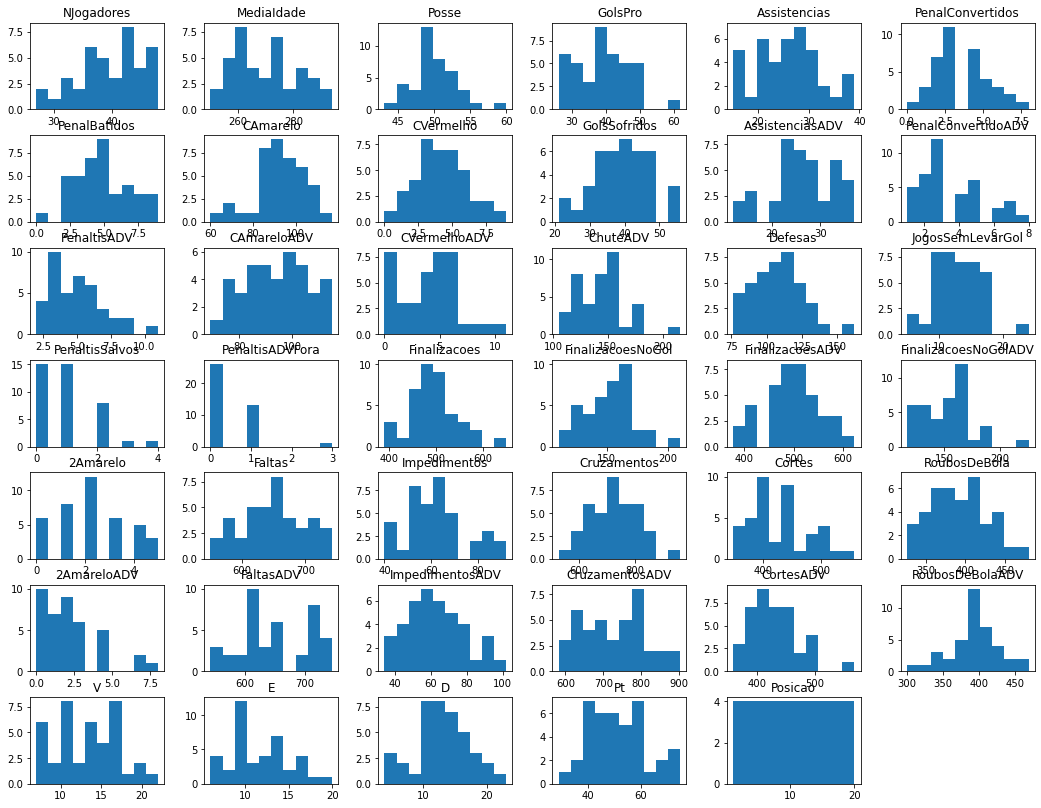

In [8]:
df1.hist(bins=10,figsize=(18,14),grid=False)
plt.show

Visualmente nada muito fora do padrão.

In [9]:
df[['Pt','Posicao',"V",'E','D']].corr()

,Pt,Posicao,V,E,D
Pt,1.000000,-0.965650,0.954898,-0.002042,-0.849475
Posicao,-0.965650,1.000000,-0.940414,0.060997,0.790749
V,0.954898,-0.940414,1.000000,-0.287534,-0.667800
E,-0.002042,0.060997,-0.287534,1.000000,-0.520892
D,-0.849475,0.790749,-0.667800,-0.520892,1.000000


Como suspeitavamos os numeros de Vitorias/Derrotas estão altamente relacionados com numero de pontos e a posição, entretanto, surprendente, o numero de empates não estão tão correlacionados.

### Analisando:
- os dados com reelação a Vitorias, Empates e Derrotas (o que estamos pensando em prever com a regrssão)

In [10]:
df1.iloc[:,[37,38,39,0,1,2,3,4,5,6,7,8,9]].corr().head(3).drop(["V",'E','D'],axis=1)

,NJogadores,MediaIdade,Posse,GolsPro,Assistencias,PenalConvertidos,PenalBatidos,CAmarelo,CVermelho
V,-0.455267,0.306374,0.232035,0.753127,0.744531,0.273260,0.364173,-0.543092,-0.041581
E,-0.175337,-0.163379,0.029593,-0.245237,-0.177983,-0.176036,-0.162940,0.090165,-0.131180
D,0.542027,-0.146087,-0.229802,-0.480644,-0.525249,-0.106737,-0.197943,0.413963,0.139007


In [11]:
df1.iloc[:,[37,38,39,10,11,12,13,14,15,16,17,18,19]].corr().head(3).drop(["V",'E','D'],axis=1)

,GolsSofridos,AssistenciasADV,PenalConvertidoADV,PenaltisADV,CAmareloADV,CVermelhoADV,ChuteADV,Defesas,JogosSemLevarGol,PenaltisSalvos
V,-0.539160,-0.432573,-0.175833,-0.012918,0.034181,0.107803,-0.340004,-0.154057,0.548815,0.208708
E,-0.460816,-0.477975,-0.075260,-0.148141,-0.080966,0.090873,-0.210067,-0.081376,0.331450,-0.218022
D,0.838660,0.756999,0.215202,0.126642,0.032460,-0.166703,0.466288,0.200547,-0.746726,-0.016575


In [12]:
df1.iloc[:,[37,38,39,20,21,22,23,24,25,26,27,28,29]].corr().head(3).drop(["V",'E','D'],axis=1)

,PenaltisADVFora,Finalizacoes,FinalizacoesNoGol,FinalizacoesADV,FinalizacoesNoGolADV,2Amarelo,Faltas,Impedimentos,Cruzamentos,Cortes
V,0.152558,0.268289,0.534663,-0.158416,-0.293155,-0.093230,-0.266061,0.157219,0.131609,-0.127323
E,0.057520,0.094549,-0.116862,-0.055278,-0.303784,-0.249904,-0.169373,0.133844,0.089506,-0.134380
D,-0.180671,-0.312595,-0.385704,0.184150,0.497366,0.277307,0.368760,-0.244141,-0.186859,0.217913


In [13]:
df1.iloc[:,[37,38,39,30,31,32,33,34,35,36]].corr().head(3).drop(["V",'E','D'],axis=1)

,RoubosDeBola,2AmareloADV,FaltasADV,ImpedimentosADV,CruzamentosADV,CortesADV,RoubosDeBolaADV
V,0.024638,-0.022136,-0.246199,0.106074,-0.065691,0.285117,-0.432950
E,0.061529,0.107186,-0.147938,-0.426589,-0.093671,-0.228659,0.024537
D,-0.069777,-0.063572,0.334399,0.236988,0.131345,-0.076409,0.366802


In [14]:
dfVED=df1.iloc[:,[37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]].corr().head(3).drop(["V",'E','D'],axis=1).T
dfVED.abs().sort_values('D')

,V,E,D
PenaltisSalvos,0.208708,0.218022,0.016575
CAmareloADV,0.034181,0.080966,0.032460
2AmareloADV,0.022136,0.107186,0.063572
RoubosDeBola,0.024638,0.061529,0.069777
CortesADV,0.285117,0.228659,0.076409
PenalConvertidos,0.273260,0.176036,0.106737
PenaltisADV,0.012918,0.148141,0.126642
CruzamentosADV,0.065691,0.093671,0.131345
CVermelho,0.041581,0.131180,0.139007
MediaIdade,0.306374,0.163379,0.146087


In [15]:
df[['GolsSofridos','JogosSemLevarGol','AssistenciasADV']].corr()

,GolsSofridos,JogosSemLevarGol,AssistenciasADV
GolsSofridos,1.000000,-0.797704,0.876910
JogosSemLevarGol,-0.797704,1.000000,-0.649356
AssistenciasADV,0.876910,-0.649356,1.000000


## III. Data Preparation

+ Select data:
    - Selecionar os dados mais relacionados
+ Clean data:   
    - Os dados já estão bem limpos, meio que, analisamos bem os dados na hora do scraping
+ Construct data/transform data/feature engineering:   
    - numero geral -> numero por partida
+ Integrate data: 
    - Ate o momento não achamos necessario
+ (Re) Format data:   
    - Ate o momento não achamos necessario

----

- Até aqui utilizamos os dados de 2019 e de 2020 ('oi1920.csv'), porém daqui para frente vamos usar os dados de 2019 para modelar os de 2020. Para tanto fizemos:
    - Função `DADOS` que abre o csv já faz uma limpeza previa retirando colunas indesejadas.
    - Usou o `MaxAbsScaler` para fazer com que todas as colunas exeto Pts, V\D\E ficassem com valores entre 1 e 0.
    - Função `reduzir` que testa a importância de cada feature e seleciona as mais relevantes para o modelo
    
---- 

In [16]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [17]:
# Pega o DF, dropa as colunas que não iremos utilizar e faz a media para as categorias que são cabiveis de tal ação.
def DADOS(url:str,n_rodadas):
    df = pd.read_csv(url,sep = ';')
    df = df.drop(['VCasa',"ECasa","DCasa","GPCasa","GCCasa",
                  "PtCasa","VFora","EFora","DFora","GPFora",
                  "GCFora","PtFora"],axis=1)
    df.iloc[:,4:37]=df.iloc[:,4:37]/n_rodadas
    df.iloc[:,2]=df.iloc[:,2]/10
    return df

In [18]:
df19 = DADOS('.\Dados\dados2019.csv',38)

In [19]:
scaler = MaxAbsScaler().fit(df19.iloc[:,1:37])

In [20]:
a = scaler.transform(df19.iloc[:,1:37])

In [21]:
df191 = df19
df191.iloc[:,1:37]=a
df191

,Equipe,NJogadores,MediaIdade,Posse,GolsPro,Assistencias,PenalConvertidos,PenalBatidos,CAmarelo,CVermelho,...,ImpedimentosADV,CruzamentosADV,CortesADV,RoubosDeBolaADV,V,E,D,Pt,Notas,Posicao
0,América (MG),0.729167,0.921233,0.820000,0.677419,0.769231,0.333333,0.555556,0.581197,0.111111,...,0.922222,0.765060,1.000000,0.868889,17,10,11,61,NaN,5
1,Atl Goianiense,0.583333,0.900685,0.813333,0.693548,0.717949,0.333333,0.666667,0.769231,0.222222,...,0.555556,0.771084,0.830266,0.873333,15,17,6,62,Promovido,4
2,Botafogo (SP),0.562500,0.910959,0.821667,0.596774,0.564103,0.666667,0.555556,0.726496,0.555556,...,0.377778,0.762651,0.811861,0.888889,13,11,14,50,NaN,9
3,Bragantino,0.666667,0.938356,1.000000,1.000000,1.000000,0.833333,0.666667,0.675214,0.777778,...,0.900000,0.701205,0.920245,0.831111,22,9,7,75,Promovido,1
4,Brasil de Pelotas,0.687500,1.000000,0.751667,0.467742,0.435897,0.333333,0.222222,0.914530,0.333333,...,0.700000,0.936145,0.865031,0.960000,11,11,16,44,NaN,14
5,CRB,0.812500,0.931507,0.760000,0.709677,0.794872,0.333333,0.222222,0.760684,0.666667,...,0.555556,1.000000,0.732106,0.960000,15,10,13,55,NaN,7
6,Coritiba,0.833333,0.890411,0.828333,0.741935,0.948718,0.500000,0.555556,0.897436,0.444444,...,0.522222,0.959036,0.858896,0.968889,18,12,8,66,Promovido,3
7,Criciúma,0.687500,0.955479,0.888333,0.467742,0.512821,0.500000,0.333333,0.931624,0.888889,...,0.644444,0.804819,0.840491,0.917778,8,15,15,39,Rebaixado,19
8,Cuiabá,0.812500,0.969178,0.806667,0.629032,0.641026,0.833333,1.000000,0.717949,0.333333,...,0.600000,0.837349,0.807771,0.913333,13,13,12,52,NaN,8
9,Figueirense,0.916667,0.938356,0.848333,0.500000,0.564103,0.166667,0.333333,0.735043,0.444444,...,0.533333,0.768675,0.777096,0.817778,7,20,11,41,NaN,16


In [22]:
def reduzir(df,coluna,theta):
    #Pega as colunas mais importantes para os dados...
    model = RandomForestRegressor(random_state=1, max_depth=10)
    model.fit(a,df.loc[:,coluna])
    features = df.columns[1:37]
    importances = model.feature_importances_
    indices = np.argsort(importances) #[0:9])  # top 10 features
    plt.figure(figsize=(12,10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.xmin = [0.01]
    plt.show()
    new_model = SelectFromModel(model,threshold=theta)
    fit = new_model.fit_transform(a, df.loc[:,coluna])
    new_model.get_support()
    selected_columns = np.array(df.columns[1:37])[new_model.get_support()]
    df3 = df[selected_columns]
    pd.options.mode.chained_assignment = None
    df3[coluna] = df[coluna]
    return df3

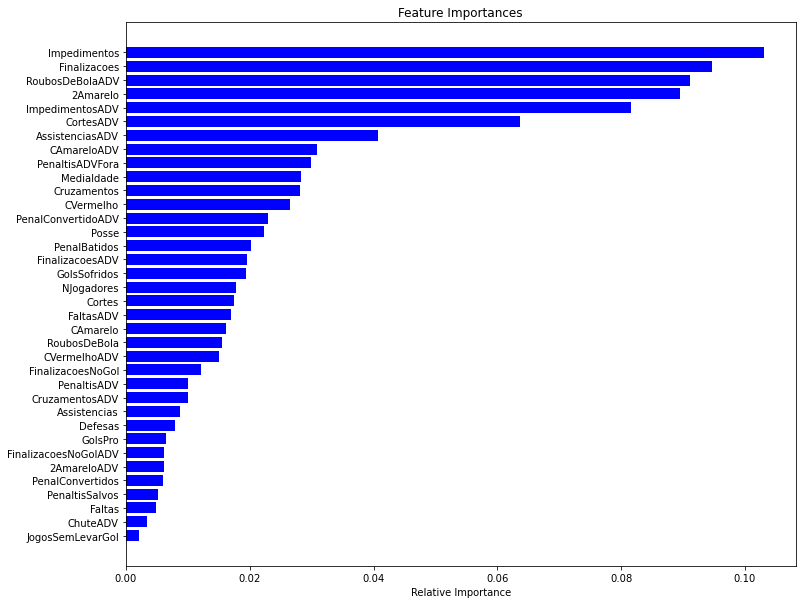

,NJogadores,MediaIdade,Posse,GolsPro,Assistencias,PenalConvertidos,PenalBatidos,CAmarelo,CVermelho,GolsSofridos,...,Cruzamentos,Cortes,RoubosDeBola,2AmareloADV,FaltasADV,ImpedimentosADV,CruzamentosADV,CortesADV,RoubosDeBolaADV,E
0,0.729167,0.921233,0.820000,0.677419,0.769231,0.333333,0.555556,0.581197,0.111111,0.603774,...,0.739312,0.928315,0.858333,0.250,0.888591,0.922222,0.765060,1.000000,0.868889,10
1,0.583333,0.900685,0.813333,0.693548,0.717949,0.333333,0.666667,0.769231,0.222222,0.528302,...,0.909281,0.718638,0.920833,0.250,0.852349,0.555556,0.771084,0.830266,0.873333,17
2,0.562500,0.910959,0.821667,0.596774,0.564103,0.666667,0.555556,0.726496,0.555556,0.698113,...,0.748697,0.709677,0.866667,0.000,0.832215,0.377778,0.762651,0.811861,0.888889,11
3,0.666667,0.938356,1.000000,1.000000,1.000000,0.833333,0.666667,0.675214,0.777778,0.509434,...,0.892596,0.646953,0.856250,0.375,0.738255,0.900000,0.701205,0.920245,0.831111,9
4,0.687500,1.000000,0.751667,0.467742,0.435897,0.333333,0.222222,0.914530,0.333333,0.849057,...,0.601668,0.887097,0.841667,0.250,0.888591,0.700000,0.936145,0.865031,0.960000,11
5,0.812500,0.931507,0.760000,0.709677,0.794872,0.333333,0.222222,0.760684,0.666667,0.811321,...,0.628780,0.632616,0.797917,0.875,0.813423,0.555556,1.000000,0.732106,0.960000,10
6,0.833333,0.890411,0.828333,0.741935,0.948718,0.500000,0.555556,0.897436,0.444444,0.641509,...,0.720542,0.623656,0.883333,0.500,0.758389,0.522222,0.959036,0.858896,0.968889,12
7,0.687500,0.955479,0.888333,0.467742,0.512821,0.500000,0.333333,0.931624,0.888889,0.679245,...,1.000000,0.731183,0.766667,1.000,0.832215,0.644444,0.804819,0.840491,0.917778,15
8,0.812500,0.969178,0.806667,0.629032,0.641026,0.833333,1.000000,0.717949,0.333333,0.754717,...,0.773723,0.634409,0.841667,0.000,0.727517,0.600000,0.837349,0.807771,0.913333,13
9,0.916667,0.938356,0.848333,0.500000,0.564103,0.166667,0.333333,0.735043,0.444444,0.603774,...,0.656934,0.675627,0.768750,0.500,0.951678,0.533333,0.768675,0.777096,0.817778,20


In [23]:
reduzir(df191,'E',0.005)

## IV. Modeling

+ Select modeling techniques: 
+ Generate test design: 
+ Build model: 
+ Assess model:  

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression , Lasso, Ridge, RidgeCV, ElasticNet, HuberRegressor, BayesianRidge, Perceptron, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

In [25]:
#Testa diversos modelos e verifica seus resultados
def print_models(X,Y):
    validation_size = 0.20
    seed = 0
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
    num_folds = 5
    score = 'r2'
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('LASSO', Lasso(random_state=seed)))
    models.append(('EN', ElasticNet(random_state=seed)))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('CART', DecisionTreeRegressor(random_state=seed)))
    models.append(('SVR', SVR()))
    models.append(('RIDGE', Ridge(random_state=seed)))
    models.append(('RIDGECV', RidgeCV()))
    #models.append(('MLPR', MLPRegressor(random_state=seed, max_iter = 20000)))
    models.append(('GPR', GaussianProcessRegressor(random_state=seed)))
    models.append(('AB', AdaBoostRegressor(random_state=seed)))
    models.append(('RF', RandomForestRegressor(random_state=seed)))
    models.append(('ET', ExtraTreesRegressor(random_state=seed)))
    models.append(('GBM', GradientBoostingRegressor(random_state=seed)))
    models.append(('HRE', HuberRegressor(max_iter = 2000)))
    models.append(('BRI' , BayesianRidge(n_iter = 2000)))
    models.append(('PER', Perceptron(penalty = 'elasticnet', tol=1e-3, random_state=0)))
    models.append(('TSR', TheilSenRegressor(random_state=0)))
    
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

### Prever PT

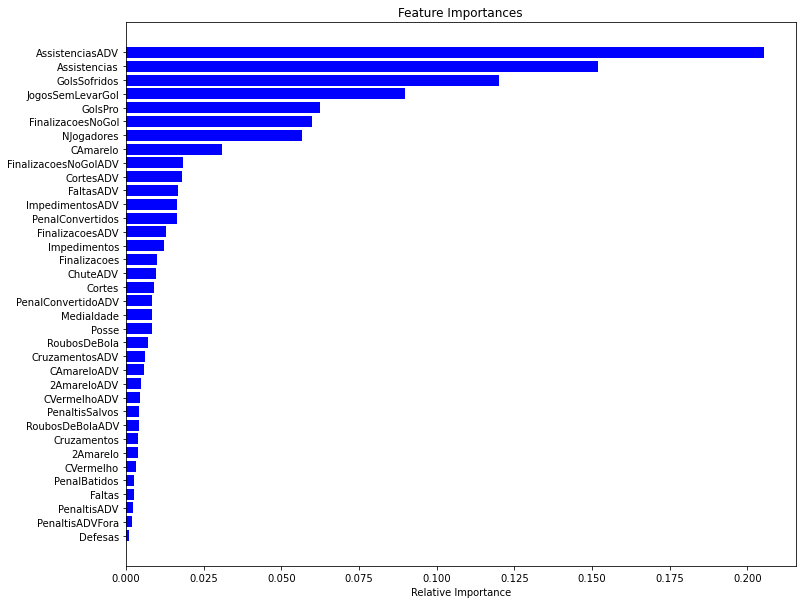

In [26]:
df3 = reduzir(df191,'Pt',0.05)

In [27]:
#Dados e Target
X = df3.values[:,0:-1]
Y = df3.values[:,-1]
print_models(X,Y)

LR: -1.415543 (2.793681)
LASSO: 0.218411 (0.469953)
EN: -0.160828 (0.365371)
KNN: 0.532834 (0.157320)
CART: -0.136817 (1.261223)
SVR: -0.126538 (0.312721)
RIDGE: 0.391433 (0.293554)
RIDGECV: 0.546085 (0.278075)
GPR: -1.121309 (1.919344)
AB: 0.403949 (0.263566)
RF: 0.519568 (0.256330)
ET: 0.545432 (0.413032)
GBM: 0.192507 (0.360212)
HRE: -0.893950 (1.847563)
BRI: 0.452594 (0.375708)
PER: -1.243499 (2.196342)
TSR: -3.318185 (5.754708)


Os legais para prever o numero de pontos são:
- RidgeCV
- BayesianRidge
- ExtraTreesRegressor

---

### Prever V/E/D

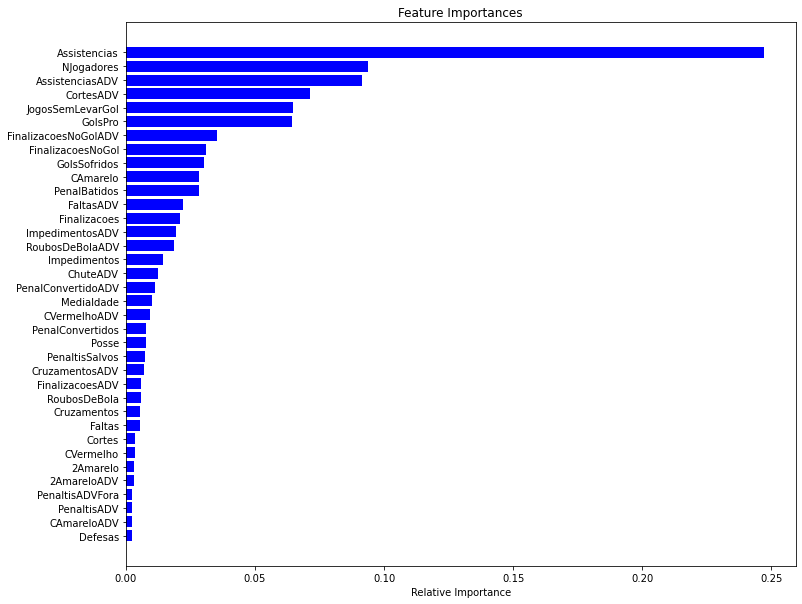

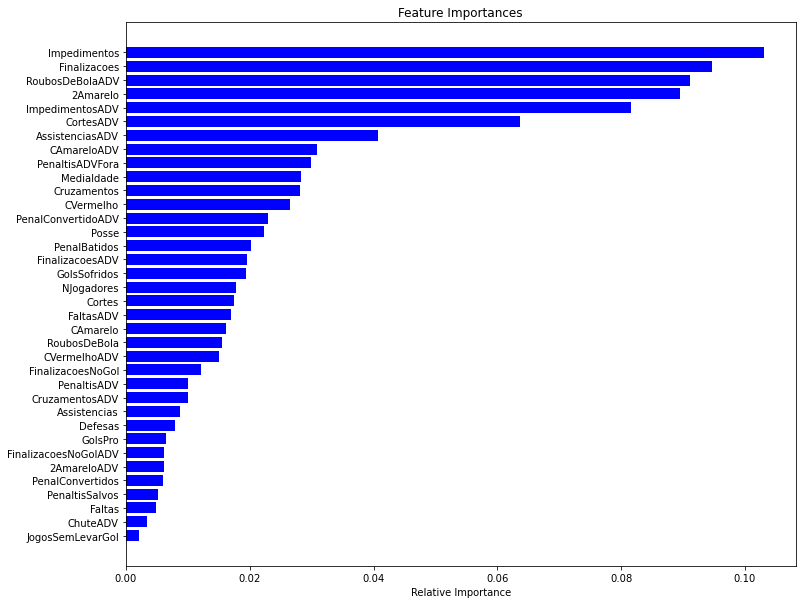

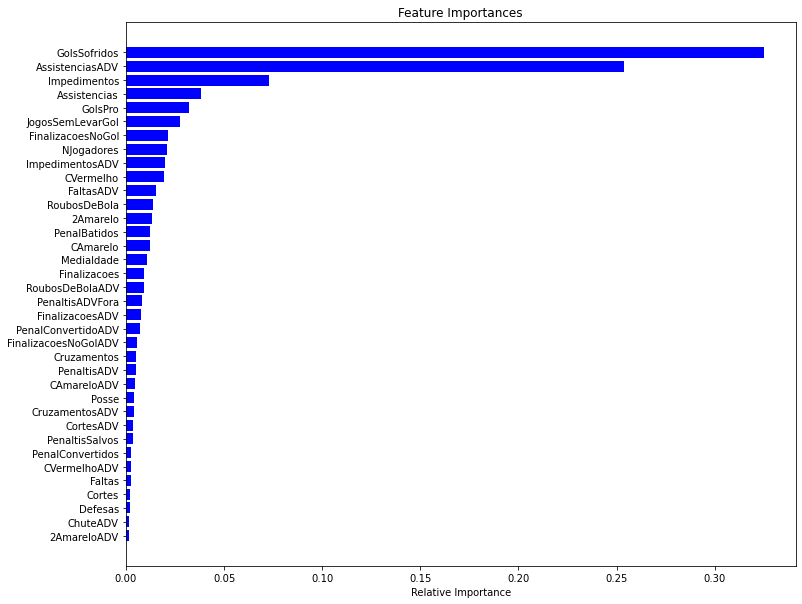

In [28]:
#Rodar todos juntos por praticidade
dfV = reduzir(df191,'V',0.05)
dfE = reduzir(df191,'E',0.03)
dfD = reduzir(df191,'D',0.05)
Xv = dfV.values[:,0:-1]
Yv = dfV.values[:,-1]
Xe = dfE.values[:,0:-1]
Ye = dfE.values[:,-1]
Xd = dfD.values[:,0:-1]
Yd = dfD.values[:,-1]

In [29]:
#Vitorias
print_models(Xv,Yv)

LR: -0.029125 (0.636328)
LASSO: -0.570993 (0.684209)
EN: -0.562820 (0.689885)
KNN: 0.181726 (0.318217)
CART: 0.064934 (0.740950)
SVR: -0.127452 (0.416654)
RIDGE: 0.081720 (0.511964)
RIDGECV: 0.337676 (0.323616)
GPR: -0.310014 (1.124827)
AB: 0.407144 (0.325845)
RF: 0.188658 (0.307739)
ET: 0.299890 (0.492080)
GBM: 0.234848 (0.624196)
HRE: -0.778251 (1.335653)
BRI: 0.266905 (0.364628)
PER: -1.057411 (1.373526)
TSR: -1.589077 (3.130845)


In [30]:
#Empates
print_models(Xe,Ye)

LR: -27.368613 (42.162137)
LASSO: -4.437946 (5.241715)
EN: -4.300995 (5.045121)
KNN: -9.624488 (15.925165)
CART: -19.918978 (36.112308)
SVR: -2.997734 (3.666726)
RIDGE: -4.214468 (6.271730)
RIDGECV: -4.292232 (6.269954)
GPR: -13.789011 (22.621705)
AB: -6.860912 (12.173540)
RF: -5.428219 (8.770613)
ET: -4.011678 (5.651398)
GBM: -10.605139 (17.409692)
HRE: -27.668170 (41.718661)
BRI: -6.080276 (9.991722)
PER: -23.803217 (37.362852)
TSR: -18.769926 (31.699440)


In [31]:
#Derrotas
print_models(Xd,Yd)

LR: -0.272356 (1.790088)
LASSO: -0.651893 (0.642053)
EN: -0.621293 (0.618633)
KNN: 0.557883 (0.128196)
CART: -2.310538 (4.766332)
SVR: 0.265956 (0.255604)
RIDGE: 0.299034 (0.247982)
RIDGECV: 0.449295 (0.442635)
GPR: -10.979045 (10.207853)
AB: -0.819090 (2.112899)
RF: -0.428584 (1.402107)
ET: 0.438600 (0.326106)
GBM: -0.252145 (1.165499)
HRE: -0.731466 (2.236699)
BRI: -0.052752 (1.409702)
PER: -9.368242 (11.931213)
TSR: -1.275282 (2.526973)


Os melhores novamente são:
- RidgeCV
- BayesianRidge

## V. Evaluation                    

+ Evaluate results: 
+ Review process: 
+ Determine next steps: 

In [32]:
Pontos = RidgeCV().fit(X,Y)
#Pontos = BayesianRidge(n_iter = 2000).fit(X,Y)
#Pontos = ExtraTreesRegressor(random_state=0).fit(X,Y)

In [33]:
#Carregando os dados de 2020, onde testaremos o modelo
df20 = DADOS('.\Dados\dados2020.csv',38)
df20.iloc[:,1:37] = scaler.transform(df20.iloc[:,1:37])
i = df20[df3.columns]
prev = np.around(Pontos.predict(i.values[:,0:-1]),0)

In [34]:
#Tabela de 2020 com Previsão e Pontos Reais
r = pd.DataFrame()
r['e']= df20.Equipe
r['pts'] = i.Pt
r['ptsprev']= prev
r['Erro']=abs(r['pts']-r['ptsprev'])
r=r.sort_values('ptsprev', ascending=False)
#r.sum() = 78 ( BayesianRidge )   81 (RidgeCV)
r

,e,pts,ptsprev,Erro
6,Chapecoense,73,68.0,5.0
9,Cuiabá,61,61.0,0.0
0,América (MG),73,60.0,13.0
12,Juventude,61,60.0,1.0
15,Operário,57,56.0,1.0
18,Sampaio Corrêa,57,55.0,2.0
8,Cruzeiro,49,55.0,6.0
5,CSA,58,52.0,6.0
3,Brasil de Pelotas,49,50.0,1.0
4,CRB,52,50.0,2.0


In [35]:
r = pd.DataFrame()
r['e']= df20.Equipe
r['ptsprev']= prev
r['pts'] = i.Pt
r['C']=df20['Posicao']
r=r.sort_values('ptsprev', ascending=False)
r['CP']=range(1,21)
r['Erro']=abs(r['C']-r['CP'])
r=r.sort_values('ptsprev', ascending=False)
r

,e,ptsprev,pts,C,CP,Erro
6,Chapecoense,68.0,73,1,1,0
9,Cuiabá,61.0,61,4,2,2
0,América (MG),60.0,73,2,3,1
12,Juventude,60.0,61,3,4,1
15,Operário,56.0,57,8,5,3
18,Sampaio Corrêa,55.0,57,6,6,0
8,Cruzeiro,55.0,49,11,7,4
5,CSA,52.0,58,5,8,3
3,Brasil de Pelotas,50.0,49,12,9,3
4,CRB,50.0,52,10,10,0


##### PS: A pontuação em todos os casos não foi lá grande coisa, porém previsão da classificação ficou legal...


### V/E/D

In [36]:
V = RidgeCV().fit(Xv,Yv)
E = RidgeCV().fit(Xe,Ye)
D = RidgeCV().fit(Xd,Yd)

In [37]:
v = df20[dfV.columns]
vprev = V.predict(v.values[:,0:-1])
e = df20[dfE.columns]
eprev = E.predict(e.values[:,0:-1])
d = df20[dfD.columns]
dprev = D.predict(d.values[:,0:-1])

In [38]:
w = pd.DataFrame()
w['Equipe'] = df20.Equipe
w['VP'] = vprev
w['EP'] = eprev
w['DP'] = dprev
w['soma'] = w.VP+w.EP+w.DP
w

,Equipe,VP,EP,DP,soma
0,América (MG),15.032441,15.736207,3.342045,34.110692
1,Avaí,11.865595,13.856785,17.668333,43.390713
2,Botafogo (SP),7.450561,13.186048,11.774599,32.411208
3,Brasil de Pelotas,10.870449,13.337444,7.040997,31.248889
4,CRB,14.349273,13.006947,15.283370,42.639590
5,CSA,13.327031,13.286952,11.580206,38.194189
6,Chapecoense,18.484804,14.280970,4.351278,37.117052
7,Confiança,11.408538,11.099083,16.651774,39.159395
8,Cruzeiro,14.211421,12.961127,9.946948,37.119496
9,Cuiabá,17.348928,11.750321,10.772537,39.871786


In [39]:
w.VP = np.round(w.VP/w.soma*38)
w.EP = np.round(w.EP/w.soma*38)
w.DP = np.round(w.DP/w.soma*38)
w['soma'] = w.VP+w.EP+w.DP
w

,Equipe,VP,EP,DP,soma
0,América (MG),17.0,18.0,4.0,39.0
1,Avaí,10.0,12.0,15.0,37.0
2,Botafogo (SP),9.0,15.0,14.0,38.0
3,Brasil de Pelotas,13.0,16.0,9.0,38.0
4,CRB,13.0,12.0,14.0,39.0
5,CSA,13.0,13.0,12.0,38.0
6,Chapecoense,19.0,15.0,4.0,38.0
7,Confiança,11.0,11.0,16.0,38.0
8,Cruzeiro,15.0,13.0,10.0,38.0
9,Cuiabá,17.0,11.0,10.0,38.0


In [40]:
# Na hora de arredontar as vezes não dá o numero certo de rodadas, portanto adicionamos ou retiramos 1 empate
# Pensamos nessa solução pois o empate é onde existe mais erro e onde tem menos infuncia no modelo...
w.EP[w.soma == 37] = w.EP +1 
w.EP[w.soma == 39] = w.EP -1 
w['soma'] = w.VP+w.EP+w.DP

w['PP'] = w.VP * 3 + w.EP
w['pontos'] = df20.Pt

w=w.sort_values('PP', ascending=False)
w['i']=range(1,21)
w

,Equipe,VP,EP,DP,soma,PP,pontos,i
6,Chapecoense,19.0,15.0,4.0,38.0,72.0,73,1
0,América (MG),17.0,17.0,4.0,38.0,68.0,73,2
9,Cuiabá,17.0,11.0,10.0,38.0,62.0,61,3
12,Juventude,16.0,12.0,10.0,38.0,60.0,61,4
8,Cruzeiro,15.0,13.0,10.0,38.0,58.0,49,5
15,Operário,14.0,14.0,10.0,38.0,56.0,57,6
3,Brasil de Pelotas,13.0,16.0,9.0,38.0,55.0,49,7
18,Sampaio Corrêa,14.0,12.0,12.0,38.0,54.0,57,8
19,Vitória,13.0,14.0,11.0,38.0,53.0,48,9
5,CSA,13.0,13.0,12.0,38.0,52.0,58,10


##### Aparentemente a pontuação foi prevista um pouco melhor porém parece que perdeu um pouco da eficiencia na classificação 

## VI. Deployment

+ Plan deployment: 
+ Plan monitoring and maintenance: 
+ Produce final report: 
+ Review project: 


Fizemos o deploy atravez do `Streamlit`, o [arquivo py](https://github.com/CarCesar/AMD/blob/main/site.py)...

#### [Aplicação](https://share.streamlit.io/carcesar/amd/main/site.py)

